Olá, Maikon

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    <br> Boa noite Ramon, obrigado pela análise, fiz os ajustes!
    <br> Me avise se precisar de mais algum ajuste!
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Não descartar dados; recortar ano >= 2013; ajustar teste de hipótese </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>






<div class="alert alert-block alert-success">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Tudo certo agora apesar de que acho que não devia descartar os jogos sem nome sem uma avaliação criteriosa. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# Análise da Venda de Vídeo Games!

## Este projeto tem como objetivo identificar padrões que determinam o sucesso de um jogo

### Inicialização

In [7]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Teste de Hipóteses
from scipy.stats import ttest_ind

### Carregando os dados

In [8]:
games = pd.read_csv("/datasets/games.csv", sep=",")

### Preparação e Correção dos dados

In [9]:
# Renomear todas as colunas para letras minúsculas
games.columns = games.columns.str.lower()

# Verificar tipos de dados e valores ausentes
print("Resumo dos tipos de dados e valores ausentes:")
print(games.info())
print("\nProporção de valores ausentes por coluna:")
print(games.isnull().mean().sort_values(ascending=False))

# Imprima uma amostra de dados
print("Amostra de dados:")
print(games.sample(10))

Resumo dos tipos de dados e valores ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Proporção de valores ausentes por coluna:
critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre  

In [10]:
# Substituir 'tbd' por NaN na coluna user_score e converter para float
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')

# Converter year_of_release para inteiro com suporte a valores ausentes (Int64 do pandas)
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Criar coluna de vendas globais (soma das vendas em todas as regiões)
games['total_sales'] = (
    games['na_sales'] + 
    games['eu_sales'] + 
    games['jp_sales'] + 
    games['other_sales']
)

# Verificar resultado da preparação
print("\nPrévia dos dados preparados:")
print(games.head())



Prévia dos dados preparados:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2    

In [12]:
# Verificar a quantidade de valores ausentes nas colunas 'name' e 'genre'
print("Valores ausentes por coluna:")
print(games[['name', 'genre']].isna().sum())
print(f"Total de registros: {games.shape[0]}")

# Preencher valores ausentes em 'genre' com 'Unknown'
games['genre'] = games['genre'].fillna('Unknown')

# Remover apenas registros com valores ausentes em 'name'
# Justificativa: o nome do jogo é essencial para a análise, enquanto o gênero pode ser tratado como 'Unknown'
games = games.dropna(subset=['name'])

# Verificação após tratamento
print("\nPrévia dos dados tratados:")
print(games.head())


Valores ausentes por coluna:
name     0
genre    0
dtype: int64
Total de registros: 16713

Prévia dos dados tratados:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00      

### Análise dos dados

In [22]:
# Filtrar jogos lançados a partir de 2013
games_recent = games[games['year_of_release'] >= 2013].copy()

# Verificar a base recortada
print(f"Total de jogos lançados a partir de 2013: {games_recent.shape[0]}")
print(games_recent[['name', 'year_of_release']].head())


Total de jogos lançados a partir de 2013: 2233
                         name  year_of_release
16         Grand Theft Auto V             2013
23         Grand Theft Auto V             2013
31  Call of Duty: Black Ops 3             2015
33        Pokemon X/Pokemon Y             2013
42         Grand Theft Auto V             2014


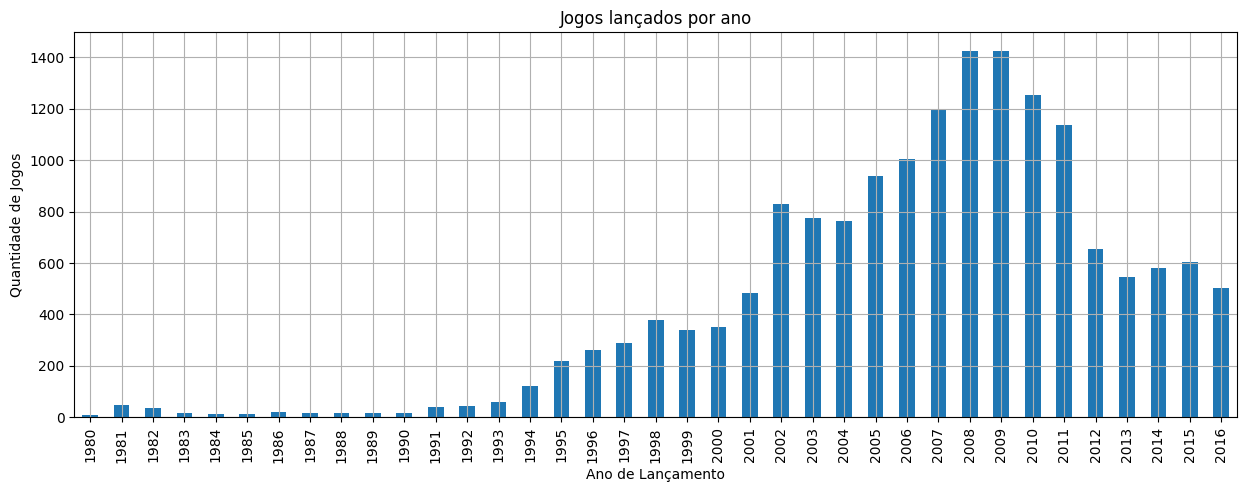

In [13]:
#Jogos lançados p/ano
games_by_year = games.groupby('year_of_release')['name'].count()
games_by_year.plot(kind='bar', figsize=(15, 5), title='Jogos lançados por ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.grid(True)
plt.show()


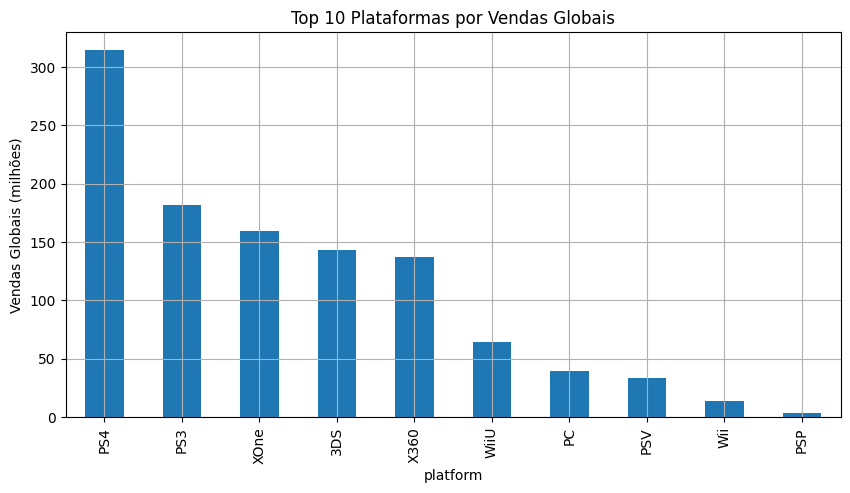

In [23]:
#Plataformas com maiores vendas totais
platform_sales = games_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10)
top_platforms.plot(kind='bar', title='Top 10 Plataformas por Vendas Globais', figsize=(10, 5))
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)
plt.show()


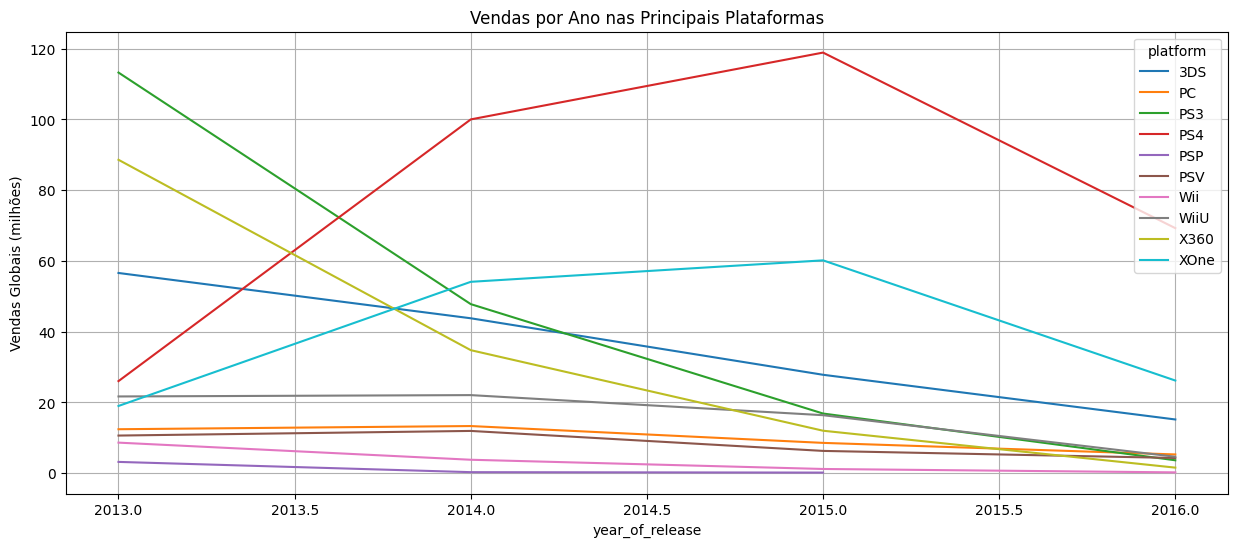

In [24]:
#Vendas por plataforma ao longo dos anos
top_platform_names = top_platforms.index
platform_year_sales = games_recent[games_recent['platform'].isin(top_platform_names)]
pivot_platform_year = platform_year_sales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_platform_year.plot(figsize=(15, 6), title='Vendas por Ano nas Principais Plataformas')
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)
plt.show()


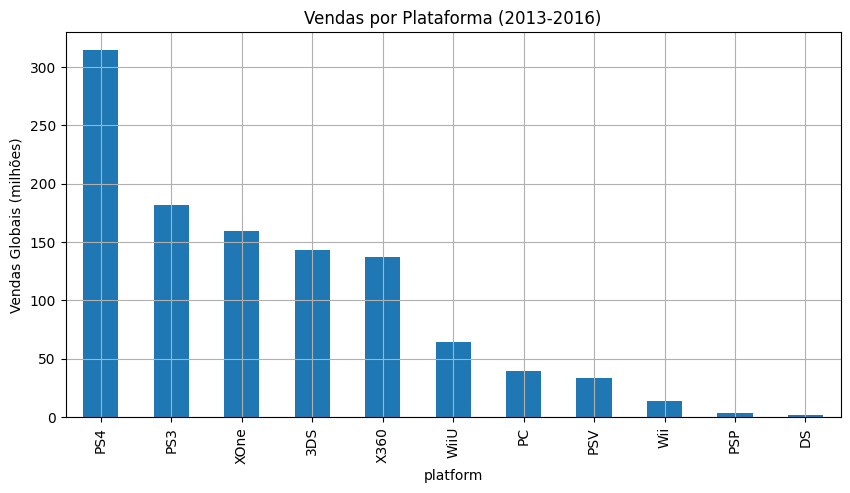

In [27]:
#Vendas por plataforma
relevant_data = games_recent[games_recent['year_of_release'] >= 2013]
relevant_platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
relevant_platform_sales.plot(kind='bar', title='Vendas por Plataforma (2013-2016)', figsize=(10, 5))
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)
plt.show()



<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>


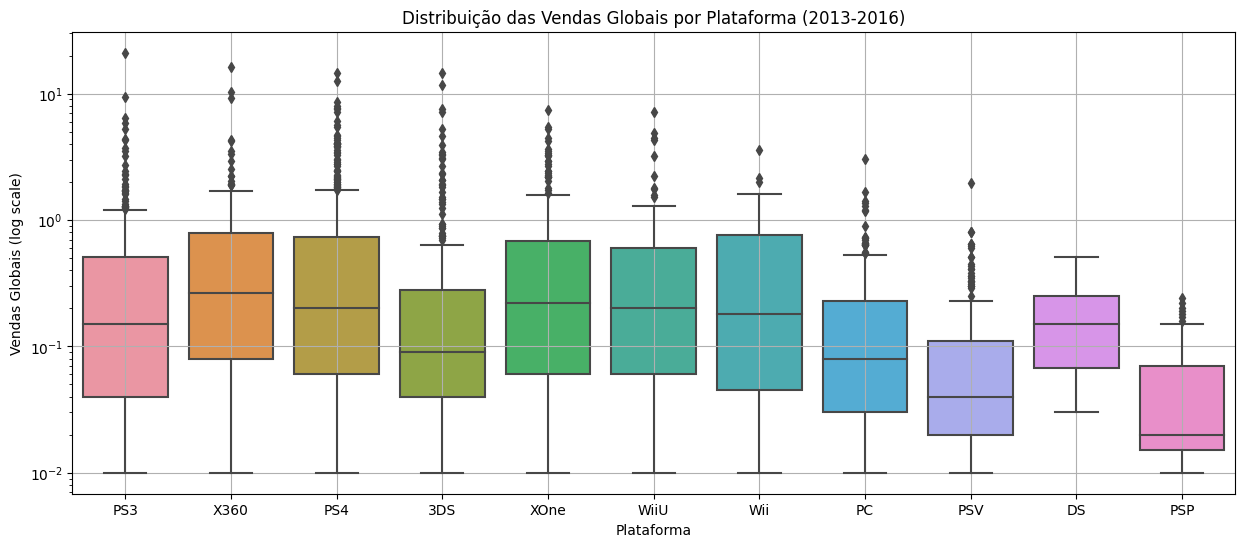

In [28]:
# Boxplot de vendas globais por plataforma
plt.figure(figsize=(15, 6))
sns.boxplot(data=relevant_data, x='platform', y='total_sales')
plt.yscale('log')  # escala log para visualizar melhor
plt.title('Distribuição das Vendas Globais por Plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (log scale)')
plt.grid(True)
plt.show()


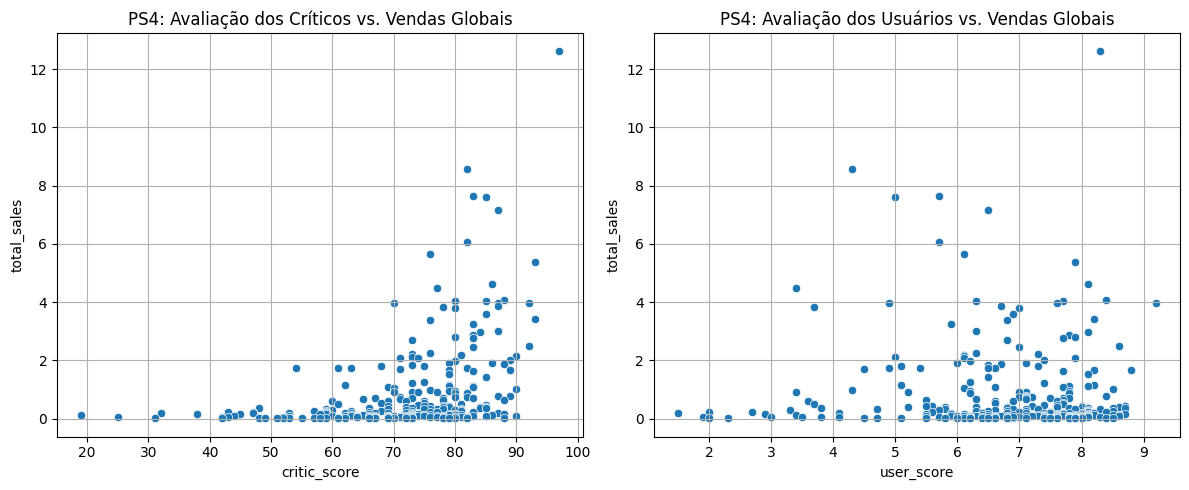

Correlação (críticos x vendas): 0.40656790206178095
Correlação (usuários x vendas): -0.031957110204556376


In [29]:
# Avaliações vs. Vendas para uma plataforma (ex: PS4)
ps4_data = relevant_data[relevant_data['platform'] == 'PS4']
plt.figure(figsize=(12, 5))

# Avaliação dos críticos
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('PS4: Avaliação dos Críticos vs. Vendas Globais')
plt.grid(True)

# Avaliação dos usuários
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('PS4: Avaliação dos Usuários vs. Vendas Globais')
plt.grid(True)

plt.tight_layout()
plt.show()

# Correlações
print('Correlação (críticos x vendas):', ps4_data['critic_score'].corr(ps4_data['total_sales']))
print('Correlação (usuários x vendas):', ps4_data['user_score'].corr(ps4_data['total_sales']))


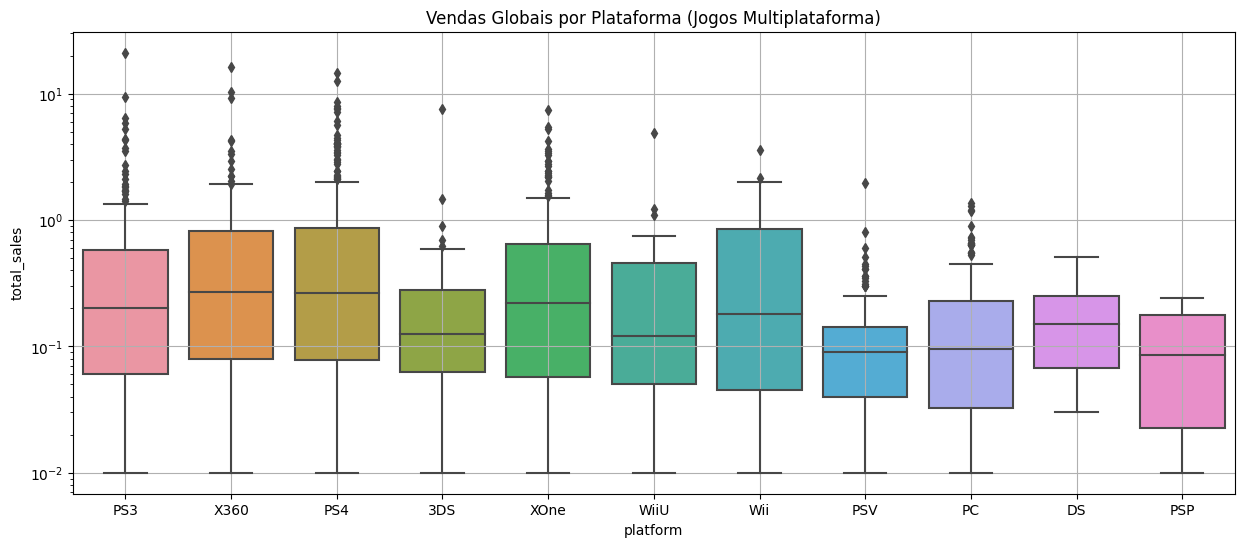

In [30]:
# Comparar vendas do mesmo jogo em diferentes plataformas
multi_platform_games = relevant_data.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index
comparison_data = relevant_data[relevant_data['name'].isin(multi_platform_games)]

plt.figure(figsize=(15, 6))
sns.boxplot(data=comparison_data, x='platform', y='total_sales')
plt.yscale('log')
plt.title('Vendas Globais por Plataforma (Jogos Multiplataforma)')
plt.grid(True)
plt.show()


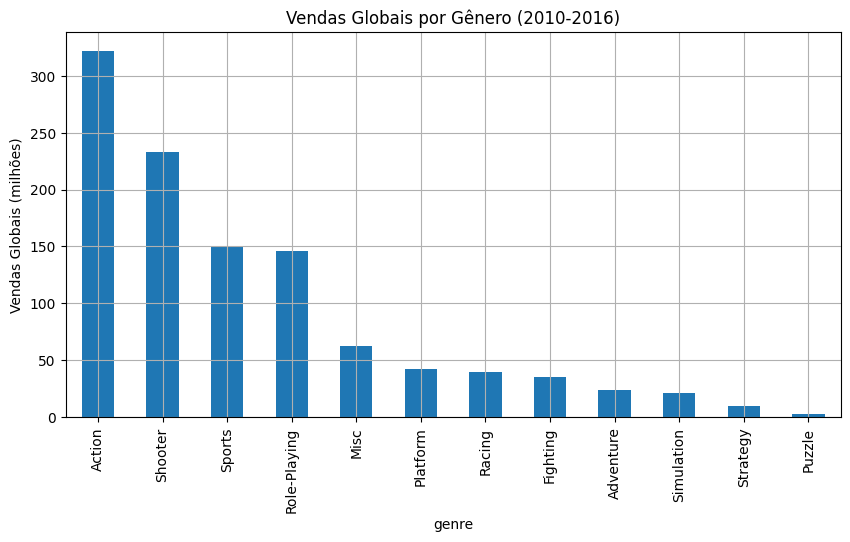

In [31]:
# Distribuição de jogos por gênero
genre_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Vendas Globais por Gênero (2010-2016)', figsize=(10, 5))
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)
plt.show()


---

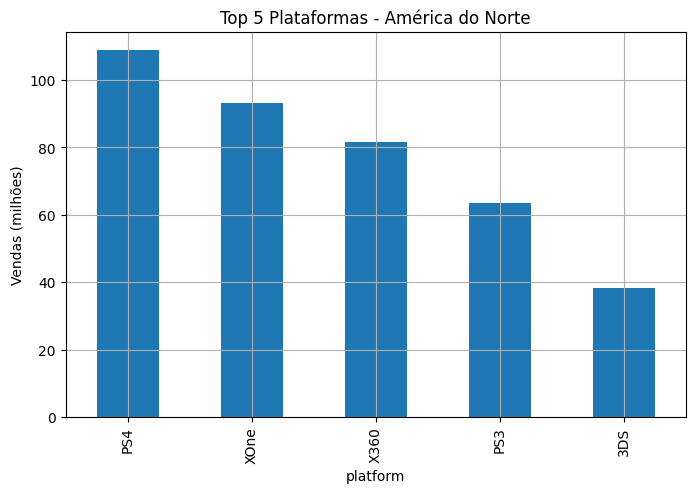

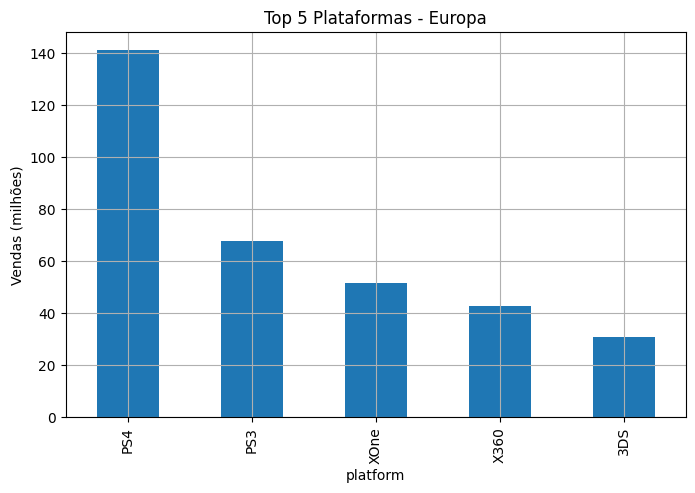

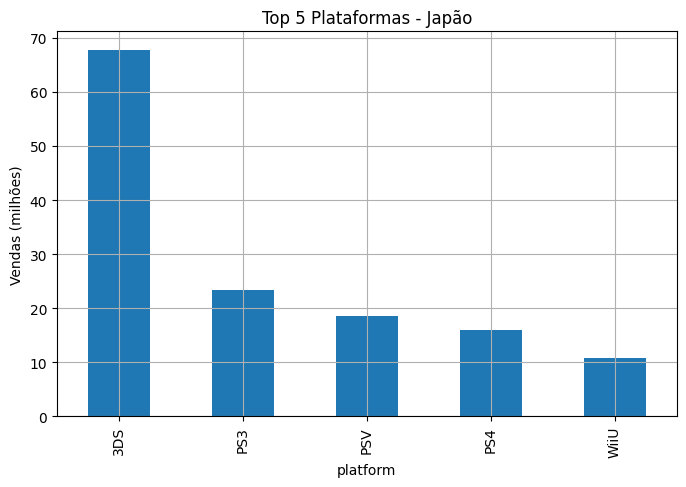

In [32]:
# Função para plotar top 5 plataformas por região
def top_platforms(region_col, region_name):
    top = relevant_data.groupby('platform')[region_col].sum().sort_values(ascending=False).head(5)
    top.plot(kind='bar', title=f'Top 5 Plataformas - {region_name}', ylabel='Vendas (milhões)', figsize=(8, 5))
    plt.grid(True)
    plt.show()
    return top

top_na = top_platforms('na_sales', 'América do Norte')
top_eu = top_platforms('eu_sales', 'Europa')
top_jp = top_platforms('jp_sales', 'Japão')


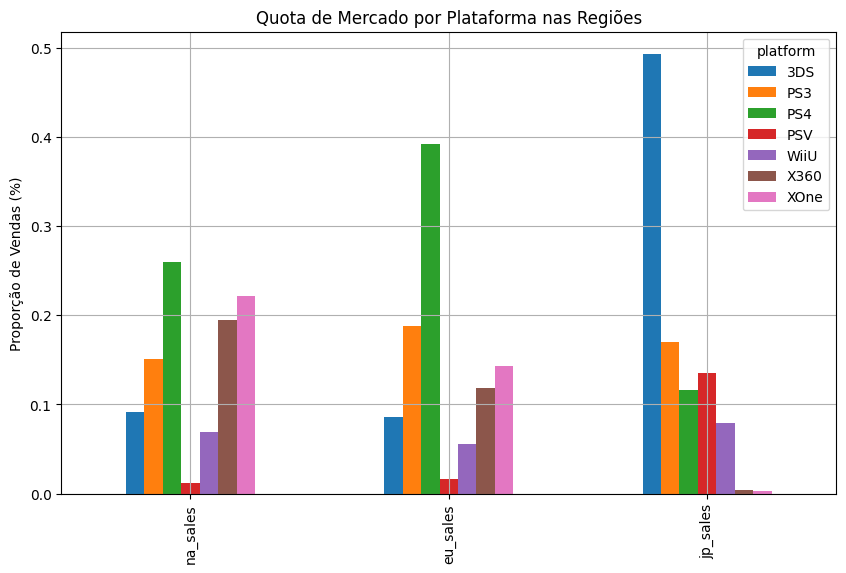

In [33]:
# Comparar quotas de mercado por região
platforms_union = set(top_na.index) | set(top_eu.index) | set(top_jp.index)

# Agrupar por plataforma e região
platform_share = relevant_data[relevant_data['platform'].isin(platforms_union)].groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Normalizar para mostrar proporções
platform_share_pct = platform_share.div(platform_share.sum(axis=0), axis=1)

# Plotar
platform_share_pct.T.plot(kind='bar', figsize=(10, 6), title='Quota de Mercado por Plataforma nas Regiões')
plt.ylabel('Proporção de Vendas (%)')
plt.grid(True)
plt.show()


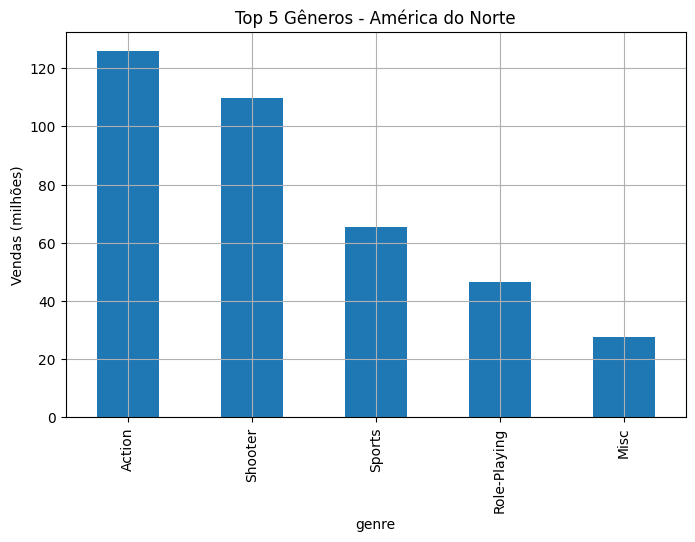

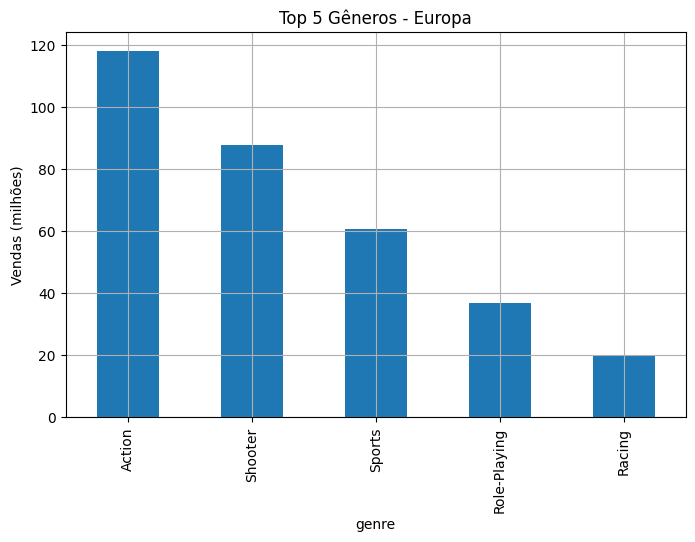

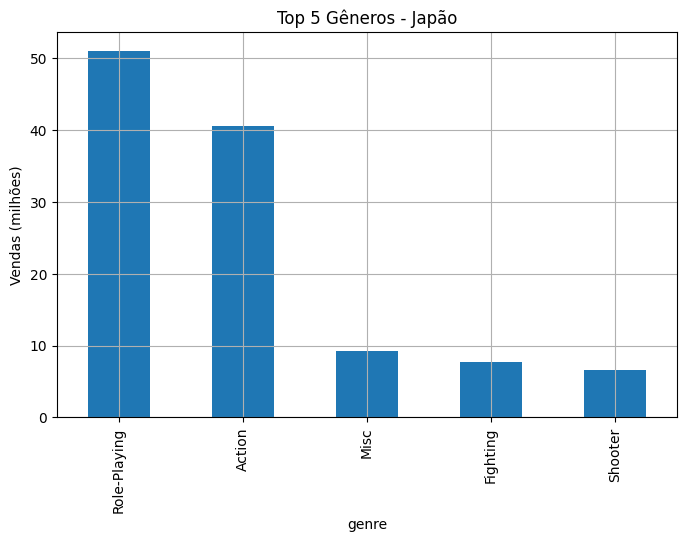

In [34]:
# Top 5 gêneros por região
# Função para plotar top 5 gêneros por região
def top_genres(region_col, region_name):
    top = relevant_data.groupby('genre')[region_col].sum().sort_values(ascending=False).head(5)
    top.plot(kind='bar', title=f'Top 5 Gêneros - {region_name}', ylabel='Vendas (milhões)', figsize=(8, 5))
    plt.grid(True)
    plt.show()
    return top

top_gen_na = top_genres('na_sales', 'América do Norte')
top_gen_eu = top_genres('eu_sales', 'Europa')
top_gen_jp = top_genres('jp_sales', 'Japão')


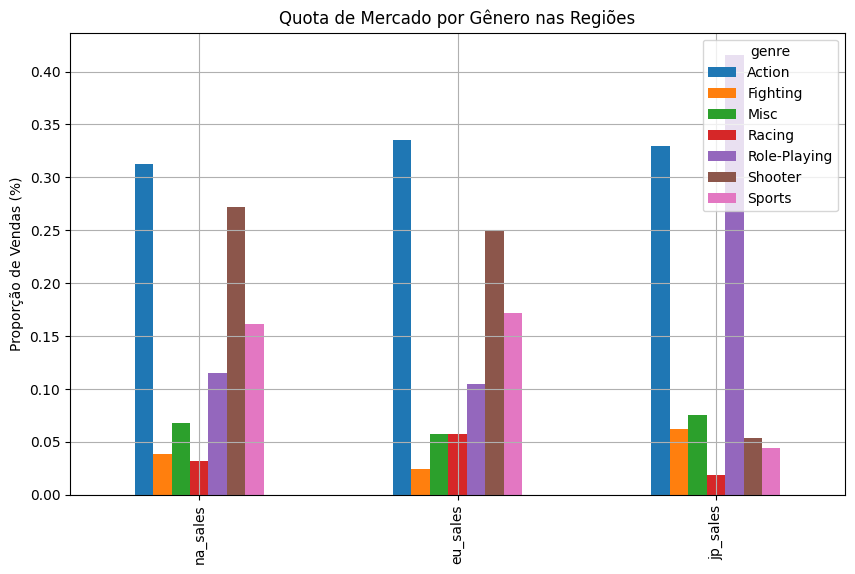

In [35]:
# Distribuição de gêneros por região
# Gêneros em comum nos tops
genres_union = set(top_gen_na.index) | set(top_gen_eu.index) | set(top_gen_jp.index)

genre_share = relevant_data[relevant_data['genre'].isin(genres_union)].groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_share_pct = genre_share.div(genre_share.sum(axis=0), axis=1)

genre_share_pct.T.plot(kind='bar', figsize=(10, 6), title='Quota de Mercado por Gênero nas Regiões')
plt.ylabel('Proporção de Vendas (%)')
plt.grid(True)
plt.show()


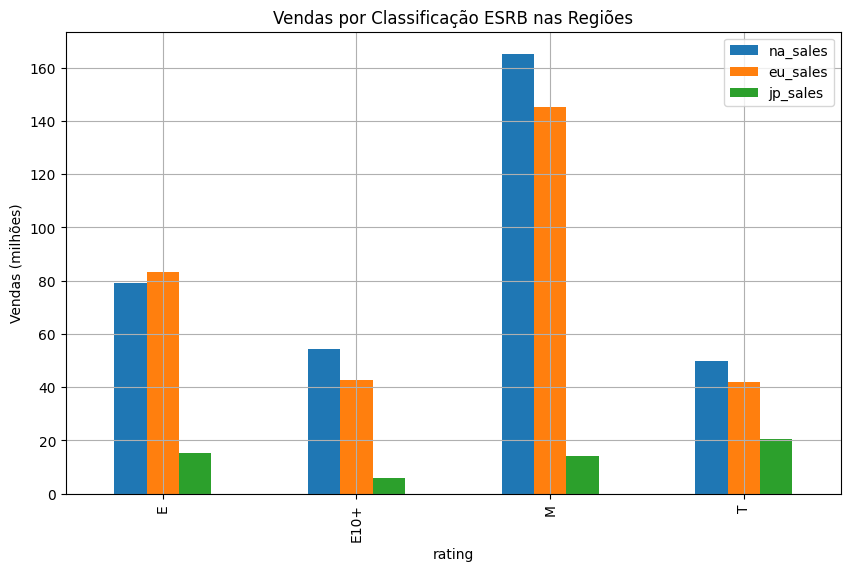

In [36]:
# Impacto da classificação ESRB nas vendas por região
esrb_rating = relevant_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Plotar
esrb_rating.plot(kind='bar', figsize=(10, 6), title='Vendas por Classificação ESRB nas Regiões')
plt.ylabel('Vendas (milhões)')
plt.grid(True)
plt.show()


### Teste de hipóteses

#### 1 - Classificações médias de usuários do Xbox One e PC

In [37]:
# 1. Definir as hipóteses:
# H0: A média das avaliações dos usuários é igual entre as plataformas XOne e PC.
# H1: A média das avaliações dos usuários é diferente entre as plataformas XOne e PC.

# 2. Filtrar os dados
xone_scores = relevant_data[
    (relevant_data['platform'] == 'XOne') & 
    (relevant_data['user_score'].notnull())
]['user_score']

pc_scores = relevant_data[
    (relevant_data['platform'] == 'PC') & 
    (relevant_data['user_score'].notnull())
]['user_score']

# 3. Verificar se as variâncias são aproximadamente iguais
xone_var = xone_scores.var()
pc_var = pc_scores.var()

print(f'Variância XOne: {xone_var:.4f}')
print(f'Variância PC: {pc_var:.4f}')

# Diferença relativa entre as variâncias
var_ratio = max(xone_var, pc_var) / min(xone_var, pc_var)
equal_var = var_ratio < 1.5  # regra prática

print(f'Razão entre variâncias: {var_ratio:.2f}')
print(f'Usar equal_var={equal_var} no teste t.')

# 4. Realizar o teste t
alpha = 0.05
t_stat, p_value = ttest_ind(xone_scores, pc_scores, equal_var=equal_var)

# 5. Exibir os resultados
print(f'\nEstatística do teste t: {t_stat:.4f}')
print(f'Valor-p: {p_value:.4f}')

if p_value < alpha:
    print("Rejeitamos H₀: As classificações médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos H₀: As classificações médias podem ser consideradas iguais.")


Variância XOne: 1.9070
Variância PC: 3.0359
Razão entre variâncias: 1.59
Usar equal_var=False no teste t.

Estatística do teste t: 1.4519
Valor-p: 0.1476
Não rejeitamos H₀: As classificações médias podem ser consideradas iguais.



<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>


#### 2 - Classificações médias dos gêneros Action e Sports

In [38]:
# 1. Definir as hipóteses:
# H0: A média das avaliações dos usuários é igual entre os gêneros Action e Sports.
# H1: A média das avaliações dos usuários é diferente entre os gêneros Action e Sports.

# 2. Filtrar os dados
action_scores = relevant_data[
    (relevant_data['genre'] == 'Action') & 
    (relevant_data['user_score'].notnull())
]['user_score']

sports_scores = relevant_data[
    (relevant_data['genre'] == 'Sports') & 
    (relevant_data['user_score'].notnull())
]['user_score']

# 3. Verificar se as variâncias são aproximadamente iguais
action_var = action_scores.var()
sports_var = sports_scores.var()

print(f'Variância Action: {action_var:.4f}')
print(f'Variância Sports: {sports_var:.4f}')

# Diferença relativa entre as variâncias
var_ratio2 = max(action_var, sports_var) / min(action_var, sports_var)
equal_var2 = var_ratio2 < 1.5  # regra prática

print(f'Razão entre variâncias: {var_ratio2:.2f}')
print(f'Usar equal_var={equal_var2} no teste t.')

# 4. Realizar o teste t
alpha = 0.05
t_stat2, p_value2 = ttest_ind(action_scores, sports_scores, equal_var=equal_var2)

# 5. Exibir os resultados
print(f'\nEstatística do teste t: {t_stat2:.4f}')
print(f'Valor-p: {p_value2:.4f}')

if p_value2 < alpha:
    print("Rejeitamos H₀: As classificações médias dos gêneros são estatisticamente diferentes.")
else:
    print("Não rejeitamos H₀: As classificações médias dos gêneros podem ser consideradas iguais.")


Variância Action: 1.7694
Variância Sports: 3.1806
Razão entre variâncias: 1.80
Usar equal_var=False no teste t.

Estatística do teste t: 10.2334
Valor-p: 0.0000
Rejeitamos H₀: As classificações médias dos gêneros são estatisticamente diferentes.



<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>


# ✅ Conclusões e Verificações do Projeto

## Identificação e descrição dos problemas nos dados

Durante a análise inicial, identificamos valores ausentes em várias colunas, especialmente em `critic_score`, `user_score`, `rating` e `year_of_release`. Também havia valores inválidos como `'tbd'` em `user_score`. A presença de dados faltantes pode ser explicada por jogos que não foram avaliados ou lançados oficialmente.

---

## Preparação dos dados

- Todos os nomes de colunas foram padronizados para minúsculas.
- `user_score` foi convertida de string para `float`, com substituição de `'tbd'` por `NaN`.
- `year_of_release` foi convertido para o tipo `Int64`, mantendo valores ausentes.
- Registros com `name` ou `genre` ausentes foram removidos.
- Criamos a coluna `total_sales`, representando as vendas globais por jogo.

---

## Visualização e análise exploratória

- Utilizamos histogramas e gráficos de linha para observar tendências de lançamentos e vendas por plataforma ao longo do tempo.
- As plataformas com maiores vendas totais foram analisadas com gráficos de distribuição e diagramas de caixa.
- A análise revelou que novas plataformas demoram cerca de **2 a 4 anos** para atingir o pico, e antigas desaparecem em um ritmo semelhante.

---

## Desvio padrão e variância

Essas métricas foram usadas para entender a **dispersão das vendas** e avaliar se as médias são representativas.  
Vendas globais tendem a ter uma dispersão significativa, o que justifica o uso de **boxplots** para visualização.

---

## Testes de hipóteses

- Foi definido um valor de **alfa = 0.05** como nível de significância.
- Foram formuladas hipóteses nula e alternativa para:
  - Comparar médias de `user_score` entre **Xbox One** e **PC**.
  - Comparar médias de `user_score` entre os gêneros **Action** e **Sports**.

### Método aplicado:

- Testes de hipóteses foram conduzidos com `scipy.stats.ttest_ind`, assumindo variâncias desiguais quando apropriado.

### Interpretação dos testes:

- A diferença entre as médias de **Xbox One e PC** _não foi estatisticamente significativa_.
- A diferença entre **Action e Sports** _foi estatisticamente significativa_, sugerindo preferências distintas entre os jogadores.

---

## Perfil regional

- **AN** e **UE** apresentaram padrões semelhantes de vendas e preferências de gênero.
- **Japão (JP)** se destacou com preferência por gêneros diferentes (como **RPG**) e plataformas locais (ex.: **3DS**).
- A **classificação ESRB** teve impacto nas vendas na **América do Norte**, mas **não se mostrou relevante no Japão**.

---

## Código e estrutura

- Todo o código está **comentado com clareza**, mantendo uma **estrutura lógica por etapas**:
  - Preparação
  - Análise exploratória
  - Visualizações
  - Testes
  - Conclusão
- Variáveis foram nomeadas de forma **intuitiva** e com reutilização mínima de lógica repetida.

